In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Data/VNL2023.csv")

In [4]:
df.head()

,Player,Country,Age,Attack,Block,Serve,Set,Dig,Receive,Position
0,Ichikawa Yuki,Japan,28,15.80,1.13,1.40,0.07,4.80,5.60,OH
1,Romano Yuri,Italy,26,12.33,1.07,1.47,0.00,3.87,0.00,OP
2,Abdel-Aziz Nimir,Nederland,31,15.33,0.67,2.08,0.00,3.17,0.25,OP
3,Herrera Jaime Jesus,Cuba,28,15.00,0.92,1.75,0.00,3.33,0.17,OP
4,Takahashi Ran,Japan,22,11.53,0.67,1.00,0.07,6.40,5.07,OH


In [5]:
df.shape

(131, 10)

In [6]:
df.describe()

,Age,Attack,Block,Serve,Set,Dig,Receive
count,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000
mean,27.809160,5.642672,0.845573,0.535802,2.192595,3.428397,1.684198
std,4.186268,4.256229,0.700896,0.454346,6.031587,2.077823,1.989939
min,19.000000,0.000000,0.000000,0.000000,0.000000,0.530000,0.000000
25%,25.000000,2.800000,0.370000,0.240000,0.000000,1.920000,0.000000
50%,27.000000,5.170000,0.690000,0.420000,0.000000,3.000000,0.330000
75%,30.000000,8.600000,1.140000,0.760000,0.000000,4.510000,3.385000
max,41.000000,15.800000,4.080000,2.080000,26.890000,11.440000,6.690000


In [8]:
df.isna().sum()

Player      0
Country     0
Age         0
Attack      0
Block       0
Serve       0
Set         0
Dig         0
Receive     0
Position    0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
numaric_cols = df.select_dtypes(include= ["int", "float"]).columns
corr_matrix = df[numaric_cols].corr()
print(corr_matrix)

              Age    Attack     Block     Serve       Set       Dig   Receive
Age      1.000000 -0.177849 -0.101040 -0.108367  0.177757  0.167141 -0.011067
Attack  -0.177849  1.000000  0.338412  0.768859 -0.430805 -0.098999  0.169892
Block   -0.101040  0.338412  1.000000  0.335954 -0.132019 -0.348347 -0.265206
Serve   -0.108367  0.768859  0.335954  1.000000 -0.154815 -0.052501  0.039642
Set      0.177757 -0.430805 -0.132019 -0.154815  1.000000  0.131659 -0.305869
Dig      0.167141 -0.098999 -0.348347 -0.052501  0.131659  1.000000  0.624733
Receive -0.011067  0.169892 -0.265206  0.039642 -0.305869  0.624733  1.000000


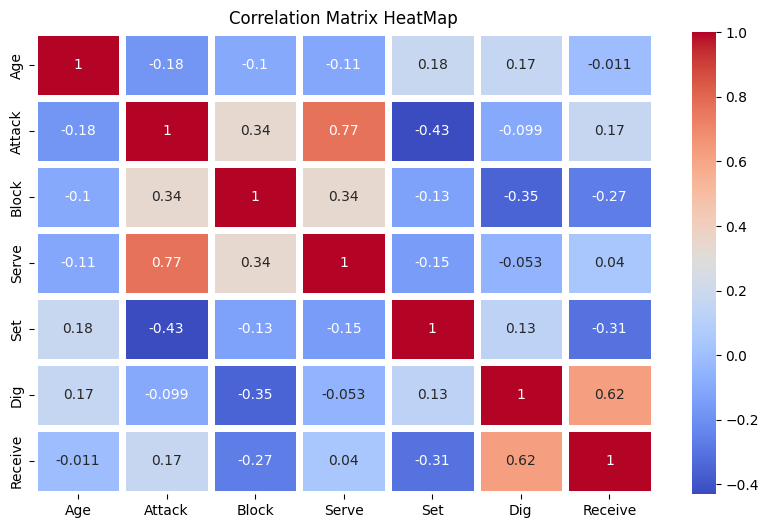

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot= True, cmap= "coolwarm", linewidths= 5)
plt.title("Correlation Matrix HeatMap")
plt.show()

In [20]:
position_count = df["Position"].value_counts()
position_count

Position
OH    42
MB    32
OP    25
S     16
L     16
Name: count, dtype: int64

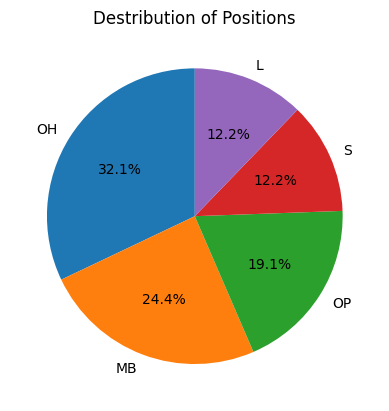

In [22]:
plt.pie(position_count, 
        labels= position_count.index, 
        autopct= "%1.1f%%", 
        startangle=90)
plt.title("Destribution of Positions");

In [24]:
avg_attack_by_country = df.groupby("Country")["Attack"].mean().sort_values(ascending= False)
avg_attack_by_country

Country
France       6.670000
Japan        6.595000
Cuba         6.344286
Serbia       5.998750
Italy        5.965000
Slovenia     5.961250
Argentina    5.925000
Nederland    5.880000
Poland       5.807000
Canada       5.405714
Bulgaria     5.282500
Brazil       5.250000
China        5.093750
Germany      4.833750
Iran         4.707778
USA          4.600000
Name: Attack, dtype: float64

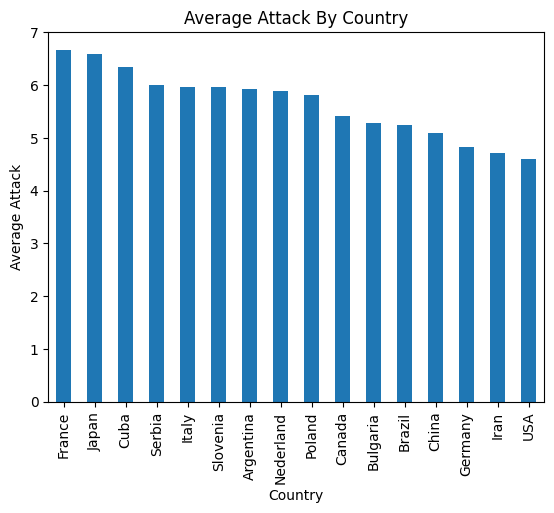

In [26]:
avg_attack_by_country.plot(kind = "bar")
plt.title("Average Attack By Country")
plt.xlabel("Country")
plt.ylabel("Average Attack");

In [28]:
df.head()

,Player,Country,Age,Attack,Block,Serve,Set,Dig,Receive,Position
0,Ichikawa Yuki,Japan,28,15.80,1.13,1.40,0.07,4.80,5.60,OH
1,Romano Yuri,Italy,26,12.33,1.07,1.47,0.00,3.87,0.00,OP
2,Abdel-Aziz Nimir,Nederland,31,15.33,0.67,2.08,0.00,3.17,0.25,OP
3,Herrera Jaime Jesus,Cuba,28,15.00,0.92,1.75,0.00,3.33,0.17,OP
4,Takahashi Ran,Japan,22,11.53,0.67,1.00,0.07,6.40,5.07,OH


In [40]:
avg_serve_by_age = df.groupby("Age")["Serve"].mean().sort_values(ascending= False)
avg_serve_by_age

Age
31    0.910000
20    0.880000
21    0.770000
26    0.681053
28    0.667273
35    0.666667
27    0.662500
36    0.660000
24    0.640667
22    0.534286
23    0.526667
29    0.477500
30    0.429231
38    0.400000
33    0.321429
32    0.290000
37    0.270000
19    0.200000
25    0.165714
34    0.026667
41    0.000000
Name: Serve, dtype: float64

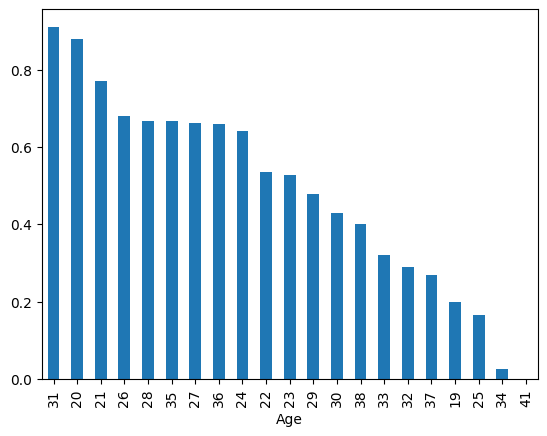

In [41]:
avg_serve_by_age.plot(kind= "bar");

In [47]:
df.groupby(["Country", "Position"])["Attack"].max().reset_index().sort_values(ascending=False, by="Attack").head(10)

,Country,Position,Attack
52,Japan,OH,15.80
58,Nederland,OP,15.33
33,France,OP,15.25
28,Cuba,OP,15.00
68,Serbia,OP,14.33
12,Bulgaria,OH,14.25
22,China,OH,13.50
72,Slovenia,OH,12.62
8,Brazil,OP,12.46
27,Cuba,OH,12.33


In [51]:
df.columns

Index(['Player', 'Country', 'Age', 'Attack', 'Block', 'Serve', 'Set', 'Dig',
       'Receive', 'Position'],
      dtype='object')

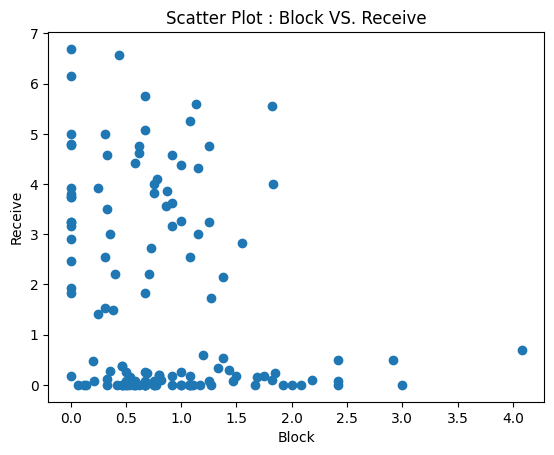

In [50]:
plt.scatter(df["Block"], df["Receive"])
plt.title("Scatter Plot : Block VS. Receive")
plt.xlabel("Block")
plt.ylabel("Receive")
plt.show()

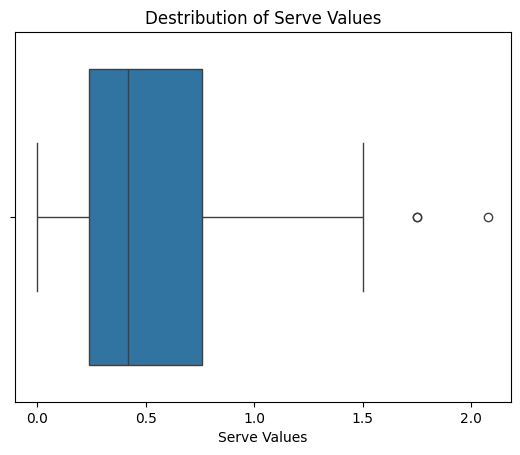

In [54]:
sns.boxplot(x = df["Serve"])
plt.title("Destribution of Serve Values")
plt.xlabel("Serve Values")
plt.show()

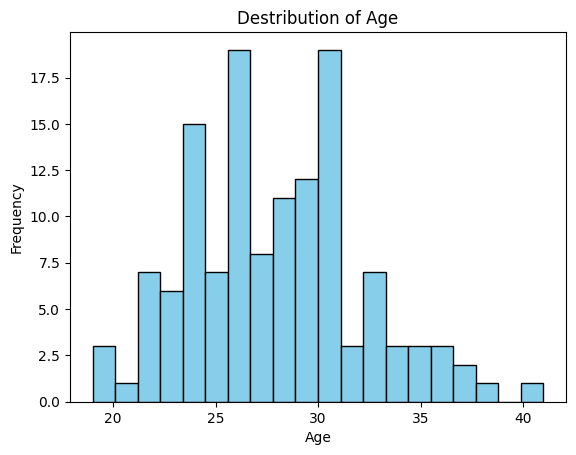

In [56]:
plt.hist(df["Age"], bins= 20, color="skyblue", edgecolor="black")
plt.title("Destribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

<Axes: xlabel='Position'>

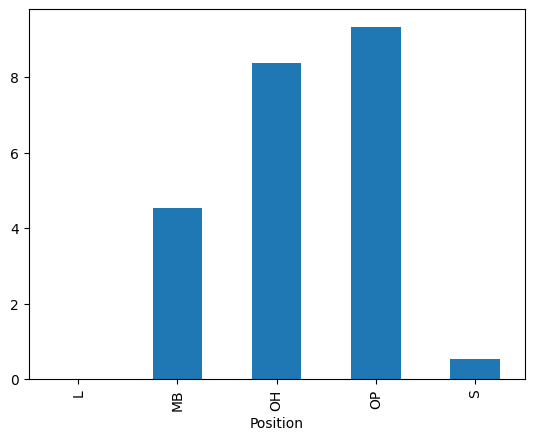

In [ ]:
avg_attack_by_position = df.groupby("Position")["Attack"].mean()
avg_attack_by_position.plot(kind="bar")
plt.title("Average Attack By Position")
plt.xlabel("Position")
plt.ylabel("Attack");

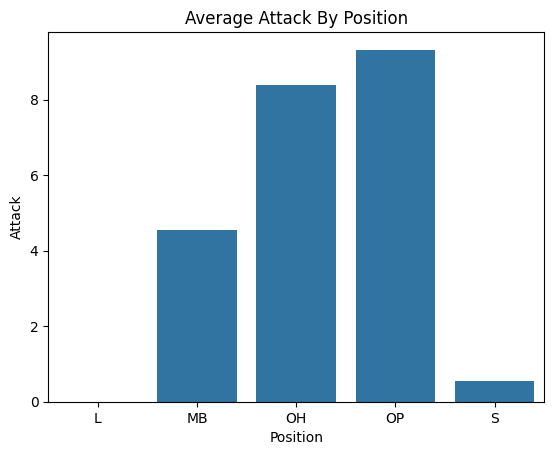

In [ ]:
sns.barplot(df.groupby("Position")["Attack"].mean())
plt.title("Average Attack By Position")
plt.xlabel("Position")
plt.ylabel("Attack");